<a href="https://colab.research.google.com/github/Jheel-patel/AutoML-Projects/blob/main/AutoML_H20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#this command might be relevant only on GPU nodes. But notebookruns on CPU as well
#If running on CPU remove the comand wherever it appears

!nvidia-smi

Sat Oct 24 19:24:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
openjdk version "11.0.8" 2020-07-14
OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)


In [3]:
pip install h2o

     |████████████████████████████████| 129.4MB 96kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.3-py2.py3-none-any.whl size=129446676 sha256=37cbc4a8d99f38ba8b9731f190dad525e5c9101eb648edbabf7eeabe639e12f5
  Stored in directory: /root/.cache/pip/wheels/3d/e6/07/53ce9be9cb61b33a79cb3ed1fc39f2dae84f6ee6fe1e373e5e
Successfully built h2o


In [4]:
import h2o

In [5]:
#Starts the h2o cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmjlrskw6
  JVM stdout: /tmp/tmpmjlrskw6/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmjlrskw6/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_unknownUser_k5hqvn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [6]:
from h2o.automl import H2OAutoML

In [7]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [9]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [10]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [11]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.5,2686.05,No


In [12]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [13]:
y

'Churn'

In [14]:
x

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [15]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["DeepLearning"], verbosity="info", nfolds=0, max_runtime_secs_per_model = 100)

In [16]:
!nvidia-smi

Sat Oct 24 19:32:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
aml.train(x=x, y= y, training_frame= churn_train,validation_frame=churn_valid)

AutoML progress: |
19:32:41.223: Project: AutoML_20201024_193241218
19:32:41.225: Cross-validation disabled by user: no fold column nor nfolds > 1.
19:32:41.225: Setting stopping tolerance adaptively based on the training frame: 0.014214817002999845
19:32:41.225: Build control seed: 10
19:32:41.225: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
19:32:41.303: training frame: Frame key: automl_training_py_2_sid_a174    cols: 21    rows: 4471  chunks: 8    size: 295648  checksum: 6896403695787920974
19:32:41.303: validation frame: Frame key: py_4_sid_a174    cols: 21    rows: 1061  chunks: 8    size: 139130  checksum: -7891598006544156803
19:32:41.308: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_a174    cols: 21    rows: 478  chunks: 8    size: 124468  checksum: -7692156555779790195
19:32:41.308: blending frame: NULL
19:32:41.308: response column: Churn


In [18]:
lb = aml.leaderboard

lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_5_AutoML_20201024_193241,0.849042,0.39728,0.679628,0.211509,0.356204,0.126882
GLM_1_AutoML_20201024_193241,0.848261,0.403546,0.661385,0.216374,0.358226,0.128326
GBM_1_AutoML_20201024_193241,0.847018,0.401998,0.64354,0.214752,0.359791,0.129449
GBM_3_AutoML_20201024_193241,0.83975,0.411976,0.661502,0.229432,0.36341,0.132067
XGBoost_2_AutoML_20201024_193241,0.839063,0.414399,0.640967,0.224448,0.364381,0.132773
GBM_2_AutoML_20201024_193241,0.838921,0.411814,0.652449,0.226981,0.36596,0.133927
XGBoost_3_AutoML_20201024_193241,0.835133,0.421213,0.622028,0.226306,0.367736,0.13523
DRF_1_AutoML_20201024_193241,0.829545,0.486064,0.633098,0.264567,0.368547,0.135827
GBM_4_AutoML_20201024_193241,0.82507,0.434642,0.639094,0.252184,0.375812,0.141234
XGBoost_1_AutoML_20201024_193241,0.821637,0.446301,0.596521,0.234699,0.378741,0.143445


In [19]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [20]:
churn_pred.head()

#Yes and no probability

predict,No,Yes
Yes,0.145624,0.854376
No,0.806016,0.193984
No,0.776692,0.223308
No,0.884173,0.115827
No,0.78224,0.21776
Yes,0.408541,0.591459
No,0.873935,0.126065
No,0.97503,0.0249695
No,0.965695,0.0343051
No,0.832369,0.167631


In [22]:
#performance report of the optimum model

aml.leader.model_performance(churn_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13545019883905024
RMSE: 0.3680355945272824
LogLoss: 0.4170339360026368
Mean Per-Class Error: 0.24745363556078892
AUC: 0.8308335786478265
AUCPR: 0.6186774133120184
Gini: 0.661667157295653

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3585485992683761: 


,,No,Yes,Error,Rate
0,No,658.0,132.0,0.1671,(132.0/790.0)
1,Yes,92.0,166.0,0.3566,(92.0/258.0)
2,Total,750.0,298.0,0.2137,(224.0/1048.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.358549,0.597122,174.0
1,max f2,0.141226,0.727788,286.0
2,max f0point5,0.517086,0.605906,111.0
3,max accuracy,0.517086,0.808206,111.0
4,max precision,0.878265,1.000000,0.0
5,max recall,0.015301,1.000000,393.0
6,max specificity,0.878265,1.000000,0.0
7,max absolute_mcc,0.361389,0.454976,173.0
8,max min_per_class_accuracy,0.248790,0.736434,220.0
9,max mean_per_class_accuracy,0.205454,0.752546,244.0



Gains/Lift Table: Avg response rate: 24.62 %, avg score: 25.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010496,0.859185,3.323467,3.323467,0.818182,0.870974,0.818182,0.870974,0.034884,0.034884,232.346723,232.346723,0.032352
1,2,0.020038,0.846987,3.655814,3.481728,0.900000,0.854482,0.857143,0.863120,0.034884,0.069767,265.581395,248.172757,0.065970
2,3,0.030534,0.820937,3.323467,3.427326,0.818182,0.838138,0.843750,0.854533,0.034884,0.104651,232.346723,242.732558,0.098322
3,4,0.040076,0.801888,3.249612,3.385013,0.800000,0.811880,0.833333,0.844377,0.031008,0.135659,224.961240,238.501292,0.126798
4,5,0.050573,0.770760,2.954193,3.295597,0.727273,0.789526,0.811321,0.832993,0.031008,0.166667,195.419309,229.559748,0.154008
5,6,0.100191,0.651091,2.655933,2.978811,0.653846,0.712947,0.733333,0.773542,0.131783,0.298450,165.593321,197.881137,0.263007
6,7,0.150763,0.560173,2.145970,2.699441,0.528302,0.605850,0.664557,0.717291,0.108527,0.406977,114.597045,169.944068,0.339888
7,8,0.200382,0.471437,1.952892,2.514581,0.480769,0.514619,0.619048,0.667105,0.096899,0.503876,95.289207,151.458103,0.402610
8,9,0.300573,0.331241,1.431377,2.153513,0.352381,0.396025,0.530159,0.576745,0.143411,0.647287,43.137689,115.351298,0.459945
9,10,0.399809,0.231094,1.132677,1.900131,0.278846,0.281509,0.467780,0.503464,0.112403,0.759690,13.267740,90.013136,0.477411


In [21]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [22]:
model_ids

['GBM_5_AutoML_20201024_193241',
 'GLM_1_AutoML_20201024_193241',
 'GBM_1_AutoML_20201024_193241',
 'GBM_3_AutoML_20201024_193241',
 'XGBoost_2_AutoML_20201024_193241',
 'GBM_2_AutoML_20201024_193241',
 'XGBoost_3_AutoML_20201024_193241',
 'DRF_1_AutoML_20201024_193241',
 'GBM_4_AutoML_20201024_193241',
 'XGBoost_1_AutoML_20201024_193241']

In [23]:
#selecting the XGBoost model

h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20201024_193241


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10752057744415035
RMSE: 0.3279033050216944
LogLoss: 0.34105633601445623
Mean Per-Class Error: 0.17475960566739435
AUC: 0.9061859537957798
AUCPR: 0.7959226629731105
Gini: 0.8123719075915596

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33962735161185265: 


,,No,Yes,Error,Rate
0,No,2728.0,527.0,0.1619,(527.0/3255.0)
1,Yes,231.0,985.0,0.19,(231.0/1216.0)
2,Total,2959.0,1512.0,0.1695,(758.0/4471.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.339627,0.722141,218.0
1,max f2,0.170219,0.801305,291.0
2,max f0point5,0.536129,0.747126,140.0
3,max accuracy,0.523183,0.850369,145.0
4,max precision,0.974456,1.000000,0.0
5,max recall,0.009034,1.000000,394.0
6,max specificity,0.974456,1.000000,0.0
7,max absolute_mcc,0.427627,0.615318,180.0
8,max min_per_class_accuracy,0.318614,0.823191,226.0
9,max mean_per_class_accuracy,0.306906,0.825240,232.0



Gains/Lift Table: Avg response rate: 27.20 %, avg score: 27.41 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010065,0.921524,3.676809,3.676809,1.000000,0.941050,1.000000,0.941050,0.037007,0.037007,267.680921,267.680921,0.037007
1,2,0.020130,0.894085,3.676809,3.676809,1.000000,0.909970,1.000000,0.925510,0.037007,0.074013,267.680921,267.680921,0.074013
2,3,0.030195,0.876505,3.513395,3.622338,0.955556,0.883701,0.985185,0.911574,0.035362,0.109375,251.339547,262.233796,0.108761
3,4,0.040036,0.859374,3.342554,3.553564,0.909091,0.868900,0.966480,0.901084,0.032895,0.142270,234.255383,255.356421,0.140426
4,5,0.050101,0.843984,3.349982,3.512666,0.911111,0.851975,0.955357,0.891218,0.033717,0.175987,234.998173,251.266594,0.172915
5,6,0.100201,0.740727,3.069479,3.291073,0.834821,0.792123,0.895089,0.841671,0.153783,0.329770,206.947912,229.107253,0.315330
6,7,0.150078,0.633840,2.687533,3.090492,0.730942,0.687825,0.840537,0.790542,0.134046,0.463816,168.753319,209.049239,0.430943
7,8,0.200179,0.539840,2.478563,2.937339,0.674107,0.586663,0.798883,0.739515,0.124178,0.587993,147.856335,193.733920,0.532694
8,9,0.300157,0.391797,1.702683,2.526094,0.463087,0.460140,0.687034,0.646459,0.170230,0.758224,70.268346,152.609396,0.629191
9,10,0.400134,0.261636,1.085769,2.166214,0.295302,0.323240,0.589156,0.565700,0.108553,0.866776,8.576916,116.621403,0.640970




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13843540861411568
RMSE: 0.37206909118350007
LogLoss: 0.42618484870361767
Mean Per-Class Error: 0.231396730791404
AUC: 0.845781337306761
AUCPR: 0.6715488047312222
Gini: 0.6915626746135219

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24877802282571793: 


,,No,Yes,Error,Rate
0,No,568.0,199.0,0.2595,(199.0/767.0)
1,Yes,60.0,234.0,0.2041,(60.0/294.0)
2,Total,628.0,433.0,0.2441,(259.0/1061.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.248778,0.643741,242.0
1,max f2,0.105461,0.760266,315.0
2,max f0point5,0.598237,0.656566,107.0
3,max accuracy,0.598237,0.803959,107.0
4,max precision,0.945981,1.000000,0.0
5,max recall,0.008734,1.000000,394.0
6,max specificity,0.945981,1.000000,0.0
7,max absolute_mcc,0.448073,0.494033,158.0
8,max min_per_class_accuracy,0.272899,0.760104,231.0
9,max mean_per_class_accuracy,0.181732,0.768603,273.0



Gains/Lift Table: Avg response rate: 27.71 %, avg score: 26.96 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010368,0.915452,2.952690,2.952690,0.818182,0.930444,0.818182,0.930444,0.030612,0.030612,195.269017,195.269017,0.028005
1,2,0.020735,0.887598,3.608844,3.280767,1.000000,0.902202,0.909091,0.916323,0.037415,0.068027,260.884354,228.076685,0.065420
2,3,0.030160,0.875065,2.526190,3.044962,0.700000,0.879834,0.843750,0.904920,0.023810,0.091837,152.619048,204.496173,0.085318
3,4,0.040528,0.852897,2.952690,3.021357,0.818182,0.862618,0.837209,0.894099,0.030612,0.122449,195.269017,202.135738,0.113323
4,5,0.050895,0.831076,2.952690,3.007370,0.818182,0.841734,0.833333,0.883432,0.030612,0.153061,195.269017,200.736961,0.141327
5,6,0.100848,0.714945,2.587473,2.799383,0.716981,0.773471,0.775701,0.828965,0.129252,0.282313,158.747272,179.938330,0.251022
6,7,0.150801,0.617646,2.587473,2.729188,0.716981,0.661799,0.756250,0.773591,0.129252,0.411565,158.747272,172.918793,0.360717
7,8,0.200754,0.530135,1.838467,2.507553,0.509434,0.576777,0.694836,0.724619,0.091837,0.503401,83.846746,150.755326,0.418656
8,9,0.300660,0.384644,1.566102,2.194720,0.433962,0.456930,0.608150,0.635669,0.156463,0.659864,56.610191,119.471989,0.496891
9,10,0.400566,0.255038,1.225645,1.953021,0.339623,0.317955,0.541176,0.556427,0.122449,0.782313,22.564497,95.302121,0.528076




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-10-24 19:32:44,0.002 sec,0.0,0.500000,0.693147,0.500000,0.271975,1.000000,0.728025,0.500000,0.693147,0.500000,0.277097,1.000000,0.722903
1,,2020-10-24 19:32:45,0.360 sec,5.0,0.364460,0.425150,0.868219,0.715357,3.431689,0.189219,0.373080,0.439054,0.852908,0.689046,3.308107,0.205467
2,,2020-10-24 19:32:45,0.868 sec,10.0,0.349783,0.385634,0.878234,0.736773,3.431689,0.193245,0.368540,0.417578,0.851815,0.686214,3.280767,0.235627
3,,2020-10-24 19:32:45,1.053 sec,15.0,0.342911,0.370218,0.885981,0.755396,3.513395,0.172445,0.370942,0.421934,0.846943,0.676932,3.608844,0.246937
4,,2020-10-24 19:32:46,1.213 sec,20.0,0.337161,0.358019,0.893721,0.771149,3.595102,0.173563,0.370666,0.424084,0.846775,0.676757,3.280767,0.226202
5,,2020-10-24 19:32:46,1.440 sec,25.0,0.332641,0.349533,0.900116,0.784913,3.676809,0.179155,0.372424,0.427437,0.844313,0.668752,3.280767,0.244109
6,,2020-10-24 19:32:46,1.785 sec,30.0,0.327903,0.341056,0.906186,0.795923,3.676809,0.169537,0.372069,0.426185,0.845781,0.671549,2.952690,0.244109



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,889.551208,1.000000,0.247835
1,MonthlyCharges,579.290710,0.651217,0.161394
2,TotalCharges,560.942322,0.630590,0.156282
3,tenure,394.357086,0.443321,0.109870
4,InternetService.Fiber optic,146.490341,0.164679,0.040813
5,TechSupport.No,144.776917,0.162753,0.040336
6,PaymentMethod.Electronic check,108.901367,0.122423,0.030341
7,gender.Female,85.691422,0.096331,0.023874
8,OnlineSecurity.No,62.041824,0.069745,0.017285
9,Contract.One year,45.693352,0.051367,0.012730



See the whole table with table.as_data_frame()


In [24]:
#Print parameters of XGBoost method

out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
out.params

{'backend': {'actual': 'cpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO',
  'input': 'bernoulli'},
 'dmatrix_type': {'actual': 'dense', 'defa

In [25]:
#These are too many parameters and hard to read
#Cobvert H20 arameters to XGBoost

out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 20,
  'min_child_weight': 10.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 11,
  'silent': True,
  'subsample': 0.6,
  'tree_method': 'exact'},
 10000)

In [26]:

out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20201024_193241


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10752057744415035
RMSE: 0.3279033050216944
LogLoss: 0.34105633601445623
Mean Per-Class Error: 0.17475960566739435
AUC: 0.9061859537957798
AUCPR: 0.7959226629731105
Gini: 0.8123719075915596

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33962735161185265: 


,,No,Yes,Error,Rate
0,No,2728.0,527.0,0.1619,(527.0/3255.0)
1,Yes,231.0,985.0,0.19,(231.0/1216.0)
2,Total,2959.0,1512.0,0.1695,(758.0/4471.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.339627,0.722141,218.0
1,max f2,0.170219,0.801305,291.0
2,max f0point5,0.536129,0.747126,140.0
3,max accuracy,0.523183,0.850369,145.0
4,max precision,0.974456,1.000000,0.0
5,max recall,0.009034,1.000000,394.0
6,max specificity,0.974456,1.000000,0.0
7,max absolute_mcc,0.427627,0.615318,180.0
8,max min_per_class_accuracy,0.318614,0.823191,226.0
9,max mean_per_class_accuracy,0.306906,0.825240,232.0



Gains/Lift Table: Avg response rate: 27.20 %, avg score: 27.41 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010065,0.921524,3.676809,3.676809,1.000000,0.941050,1.000000,0.941050,0.037007,0.037007,267.680921,267.680921,0.037007
1,2,0.020130,0.894085,3.676809,3.676809,1.000000,0.909970,1.000000,0.925510,0.037007,0.074013,267.680921,267.680921,0.074013
2,3,0.030195,0.876505,3.513395,3.622338,0.955556,0.883701,0.985185,0.911574,0.035362,0.109375,251.339547,262.233796,0.108761
3,4,0.040036,0.859374,3.342554,3.553564,0.909091,0.868900,0.966480,0.901084,0.032895,0.142270,234.255383,255.356421,0.140426
4,5,0.050101,0.843984,3.349982,3.512666,0.911111,0.851975,0.955357,0.891218,0.033717,0.175987,234.998173,251.266594,0.172915
5,6,0.100201,0.740727,3.069479,3.291073,0.834821,0.792123,0.895089,0.841671,0.153783,0.329770,206.947912,229.107253,0.315330
6,7,0.150078,0.633840,2.687533,3.090492,0.730942,0.687825,0.840537,0.790542,0.134046,0.463816,168.753319,209.049239,0.430943
7,8,0.200179,0.539840,2.478563,2.937339,0.674107,0.586663,0.798883,0.739515,0.124178,0.587993,147.856335,193.733920,0.532694
8,9,0.300157,0.391797,1.702683,2.526094,0.463087,0.460140,0.687034,0.646459,0.170230,0.758224,70.268346,152.609396,0.629191
9,10,0.400134,0.261636,1.085769,2.166214,0.295302,0.323240,0.589156,0.565700,0.108553,0.866776,8.576916,116.621403,0.640970




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13843540861411568
RMSE: 0.37206909118350007
LogLoss: 0.42618484870361767
Mean Per-Class Error: 0.231396730791404
AUC: 0.845781337306761
AUCPR: 0.6715488047312222
Gini: 0.6915626746135219

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24877802282571793: 


,,No,Yes,Error,Rate
0,No,568.0,199.0,0.2595,(199.0/767.0)
1,Yes,60.0,234.0,0.2041,(60.0/294.0)
2,Total,628.0,433.0,0.2441,(259.0/1061.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.248778,0.643741,242.0
1,max f2,0.105461,0.760266,315.0
2,max f0point5,0.598237,0.656566,107.0
3,max accuracy,0.598237,0.803959,107.0
4,max precision,0.945981,1.000000,0.0
5,max recall,0.008734,1.000000,394.0
6,max specificity,0.945981,1.000000,0.0
7,max absolute_mcc,0.448073,0.494033,158.0
8,max min_per_class_accuracy,0.272899,0.760104,231.0
9,max mean_per_class_accuracy,0.181732,0.768603,273.0



Gains/Lift Table: Avg response rate: 27.71 %, avg score: 26.96 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010368,0.915452,2.952690,2.952690,0.818182,0.930444,0.818182,0.930444,0.030612,0.030612,195.269017,195.269017,0.028005
1,2,0.020735,0.887598,3.608844,3.280767,1.000000,0.902202,0.909091,0.916323,0.037415,0.068027,260.884354,228.076685,0.065420
2,3,0.030160,0.875065,2.526190,3.044962,0.700000,0.879834,0.843750,0.904920,0.023810,0.091837,152.619048,204.496173,0.085318
3,4,0.040528,0.852897,2.952690,3.021357,0.818182,0.862618,0.837209,0.894099,0.030612,0.122449,195.269017,202.135738,0.113323
4,5,0.050895,0.831076,2.952690,3.007370,0.818182,0.841734,0.833333,0.883432,0.030612,0.153061,195.269017,200.736961,0.141327
5,6,0.100848,0.714945,2.587473,2.799383,0.716981,0.773471,0.775701,0.828965,0.129252,0.282313,158.747272,179.938330,0.251022
6,7,0.150801,0.617646,2.587473,2.729188,0.716981,0.661799,0.756250,0.773591,0.129252,0.411565,158.747272,172.918793,0.360717
7,8,0.200754,0.530135,1.838467,2.507553,0.509434,0.576777,0.694836,0.724619,0.091837,0.503401,83.846746,150.755326,0.418656
8,9,0.300660,0.384644,1.566102,2.194720,0.433962,0.456930,0.608150,0.635669,0.156463,0.659864,56.610191,119.471989,0.496891
9,10,0.400566,0.255038,1.225645,1.953021,0.339623,0.317955,0.541176,0.556427,0.122449,0.782313,22.564497,95.302121,0.528076




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-10-24 19:32:44,0.002 sec,0.0,0.500000,0.693147,0.500000,0.271975,1.000000,0.728025,0.500000,0.693147,0.500000,0.277097,1.000000,0.722903
1,,2020-10-24 19:32:45,0.360 sec,5.0,0.364460,0.425150,0.868219,0.715357,3.431689,0.189219,0.373080,0.439054,0.852908,0.689046,3.308107,0.205467
2,,2020-10-24 19:32:45,0.868 sec,10.0,0.349783,0.385634,0.878234,0.736773,3.431689,0.193245,0.368540,0.417578,0.851815,0.686214,3.280767,0.235627
3,,2020-10-24 19:32:45,1.053 sec,15.0,0.342911,0.370218,0.885981,0.755396,3.513395,0.172445,0.370942,0.421934,0.846943,0.676932,3.608844,0.246937
4,,2020-10-24 19:32:46,1.213 sec,20.0,0.337161,0.358019,0.893721,0.771149,3.595102,0.173563,0.370666,0.424084,0.846775,0.676757,3.280767,0.226202
5,,2020-10-24 19:32:46,1.440 sec,25.0,0.332641,0.349533,0.900116,0.784913,3.676809,0.179155,0.372424,0.427437,0.844313,0.668752,3.280767,0.244109
6,,2020-10-24 19:32:46,1.785 sec,30.0,0.327903,0.341056,0.906186,0.795923,3.676809,0.169537,0.372069,0.426185,0.845781,0.671549,2.952690,0.244109



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,889.551208,1.000000,0.247835
1,MonthlyCharges,579.290710,0.651217,0.161394
2,TotalCharges,560.942322,0.630590,0.156282
3,tenure,394.357086,0.443321,0.109870
4,InternetService.Fiber optic,146.490341,0.164679,0.040813
5,TechSupport.No,144.776917,0.162753,0.040336
6,PaymentMethod.Electronic check,108.901367,0.122423,0.030341
7,gender.Female,85.691422,0.096331,0.023874
8,OnlineSecurity.No,62.041824,0.069745,0.017285
9,Contract.One year,45.693352,0.051367,0.012730



See the whole table with table.as_data_frame()


In [27]:
# Lets try same for GBM model

out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [29]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33962735161185265: 


,,No,Yes,Error,Rate
0,No,2728.0,527.0,0.1619,(527.0/3255.0)
1,Yes,231.0,985.0,0.19,(231.0/1216.0)
2,Total,2959.0,1512.0,0.1695,(758.0/4471.0)


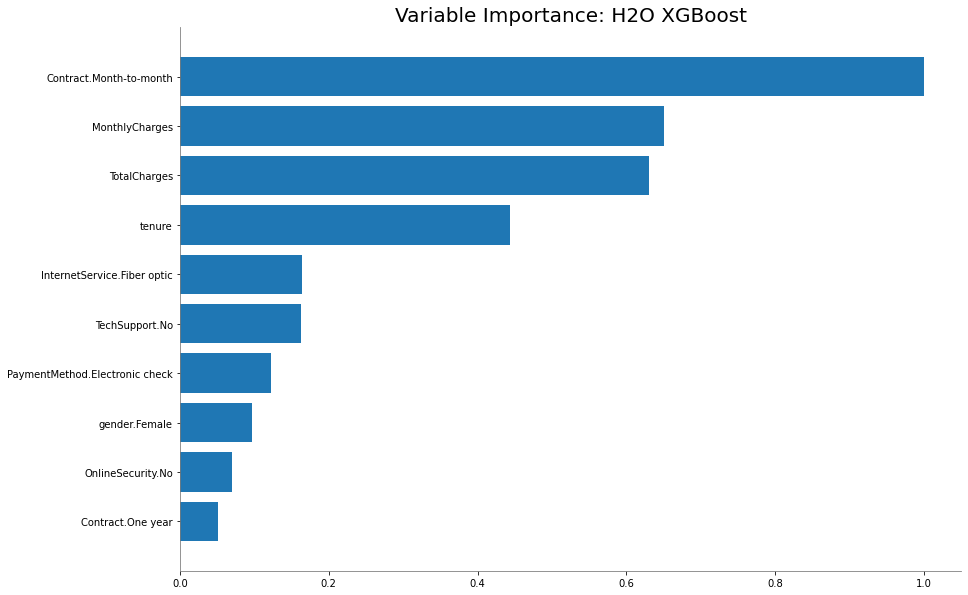

In [30]:
out.varimp_plot()

In [31]:
aml.leader.download_mojo(path = "./")

'/content/GBM_5_AutoML_20201024_193241.zip'